In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels
from scipy import stats
from pingouin import pairwise_ttests #this is for performing the pairwise tests

In [2]:
bank = pd.read_csv("./bank-full.csv")
print(bank.shape)
bank.head()

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
bank['balance'].mean()

1362.2720576850766

In [6]:
stats.ttest_1samp(bank['balance'], popmean=1341.12)

TtestResult(statistic=1.477137017325908, pvalue=0.13964587808442475, df=45210)

In [7]:
T,p = stats.ttest_1samp(bank['balance'], popmean=1341.122)
p_value = p/2
p_value

0.06984165666422609

In [8]:
loans=bank[bank.loan=="yes"].balance
no_loans=bank[bank.loan=="no"].balance

statistic, pvalue = stats.ttest_ind(loans,no_loans, equal_var=False)
print('Estadistico:',round(statistic,2),'p-valor:', round(pvalue,2))

Estadistico: -25.18 p-valor: 0.0


In [9]:
from scipy.stats import t
m = bank.balance.mean()
s = bank.balance.std()
dof = len(bank.balance)-1
confianza = 0.95
t_crit = np.abs(t.ppf((1-confianza)/2,dof)) # Valor critico
print(t_crit)
(m-s*t_crit/np.sqrt(len(bank.balance)), m+s*t_crit/np.sqrt(len(bank.balance))) # Intervalo

1.960016458188857


(1334.2053443734276, 1390.3387709967255)

In [10]:
loans.mean(),no_loans.mean()

(774.3099116510215, 1474.4536307846288)

In [11]:
import numpy as np, statsmodels.stats.api as sms
X1, X2 = bank[bank.loan=="yes"].balance,bank[bank.loan=="no"].balance
cm = sms.CompareMeans(sms.DescrStatsW(X1), sms.DescrStatsW(X2))
print(cm.tconfint_diff(usevar='unequal'))

(-754.6437941384797, -645.6436441287349)


In [12]:
print("Definiendo los simbolos de stock")
symbol_data_to_load = ['D','EXC','NEE','SO','DUK']
list_of_df = []

# Ciclo sobre simbolos
#llenar la lsita de dataframes
print(" --- Inicio de Loop --- ")
for i in symbol_data_to_load:
    print("Procesando Simbolo: " + i)
    temp_df = pd.read_csv('./'+i+'.csv',sep=',')
    temp_df['Volume_Millions'] = temp_df['Volume'] / 1000000.0
    temp_df['Symbol'] = i # Agregar nueva columna con el simbolo
    list_of_df.append(temp_df)

print(" --- Completado loop simbolos --- ")

# Combinar en un Dataframe unico usando concat
#permite pegar los dataframes de la lista
print("Agregando la data")
agg_df = pd.concat(list_of_df, axis=0)

# Agregar estadisticas de retorno y volatilidad
# es mas rápido agregarlo al dataframe que a cada uno de los registros
print('Calculando estadisticas finales')
agg_df['VolStat'] = (agg_df['High'] - agg_df['Low']) / agg_df['Open']
agg_df['Return'] = (agg_df['Close'] / agg_df['Open']) - 1.0

print("agg_df DataFrame dimension (filas, columnas): ")
print(agg_df.shape)

print("Head del DataFrame agg_df: ")
agg_df.head()

#print("agg_df['Symbol'].unique()")

Definiendo los simbolos de stock
 --- Inicio de Loop --- 
Procesando Simbolo: D
Procesando Simbolo: EXC
Procesando Simbolo: NEE
Procesando Simbolo: SO
Procesando Simbolo: DUK
 --- Completado loop simbolos --- 
Agregando la data
Calculando estadisticas finales
agg_df DataFrame dimension (filas, columnas): 
(6295, 11)
Head del DataFrame agg_df: 


,Date,Open,High,Low,Close,Adj Close,Volume,Volume_Millions,Symbol,VolStat,Return
0,2014-07-28,69.750000,71.059998,69.750000,70.879997,57.963978,1806400,1.8064,D,0.018781,0.016201
1,2014-07-29,70.669998,70.980003,69.930000,69.930000,57.187099,2231100,2.2311,D,0.014858,-0.010471
2,2014-07-30,70.000000,70.660004,68.400002,68.970001,56.402020,2588900,2.5889,D,0.032286,-0.014714
3,2014-07-31,68.629997,68.849998,67.580002,67.639999,55.314388,3266900,3.2669,D,0.018505,-0.014425
4,2014-08-01,67.330002,68.410004,67.220001,67.589996,55.273487,2601800,2.6018,D,0.017674,0.003861


In [13]:
agg_df.Symbol.unique()

array(['D', 'EXC', 'NEE', 'SO', 'DUK'], dtype=object)

In [14]:
agg_df1=agg_df[['Date','Symbol','VolStat']].groupby(by=['Date','Symbol']).mean().reset_index()
agg_df1['Date']=pd.to_datetime(agg_df1['Date'])
agg_df1.head()

,Date,Symbol,VolStat
0,2014-07-28,D,0.018781
1,2014-07-28,DUK,0.017051
2,2014-07-28,EXC,0.023878
3,2014-07-28,NEE,0.016858
4,2014-07-28,SO,0.018153


Text(0.5, 1.0, 'Comparacion de volatilidad relativa vs Fecha')

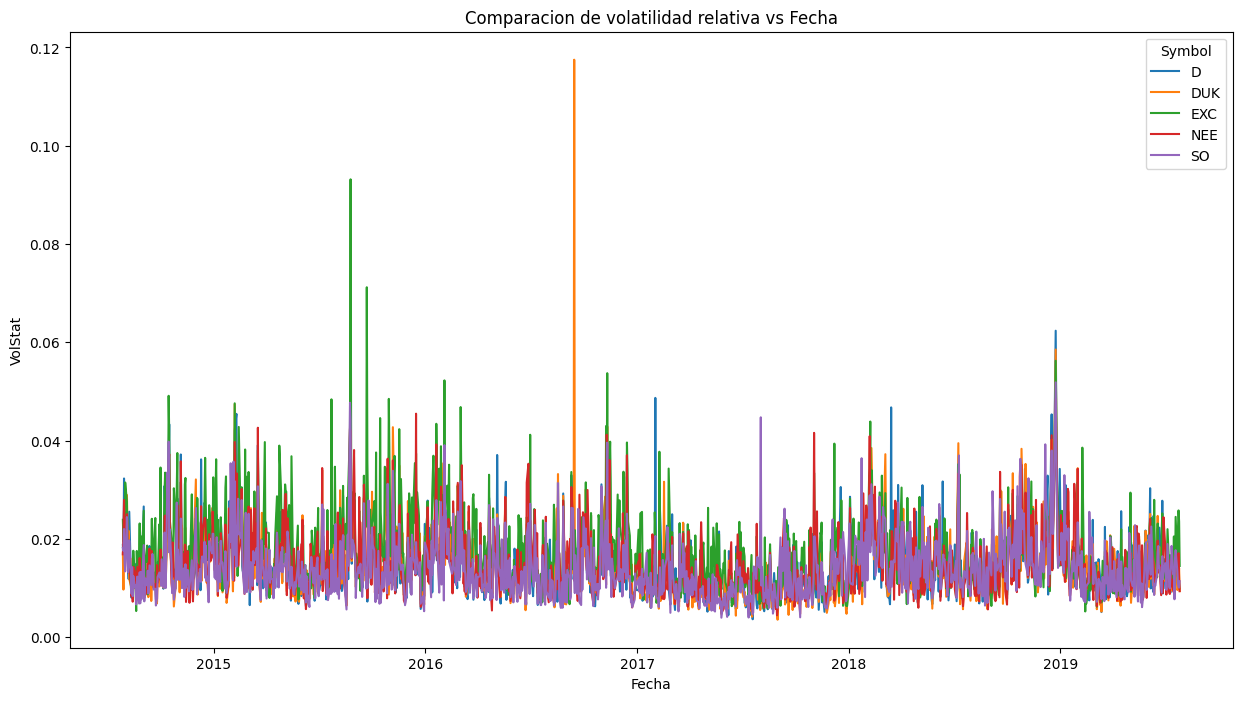

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.lineplot(x= agg_df1.Date, y= agg_df1.VolStat, hue=agg_df1.Symbol)
plt.xlabel('Fecha')
plt.ylabel('VolStat')
plt.title('Comparacion de volatilidad relativa vs Fecha')

In [16]:
agg_df2=agg_df[['Date','Symbol','Return']].groupby(by=['Date','Symbol']).mean().reset_index()
agg_df2['Date']=pd.to_datetime(agg_df1['Date'])
agg_df2.head()

,Date,Symbol,Return
0,2014-07-28,D,0.016201
1,2014-07-28,DUK,0.014732
2,2014-07-28,EXC,0.017192
3,2014-07-28,NEE,0.011272
4,2014-07-28,SO,0.016585


Text(0.5, 1.0, 'Comparacion de retorno vs Fecha')

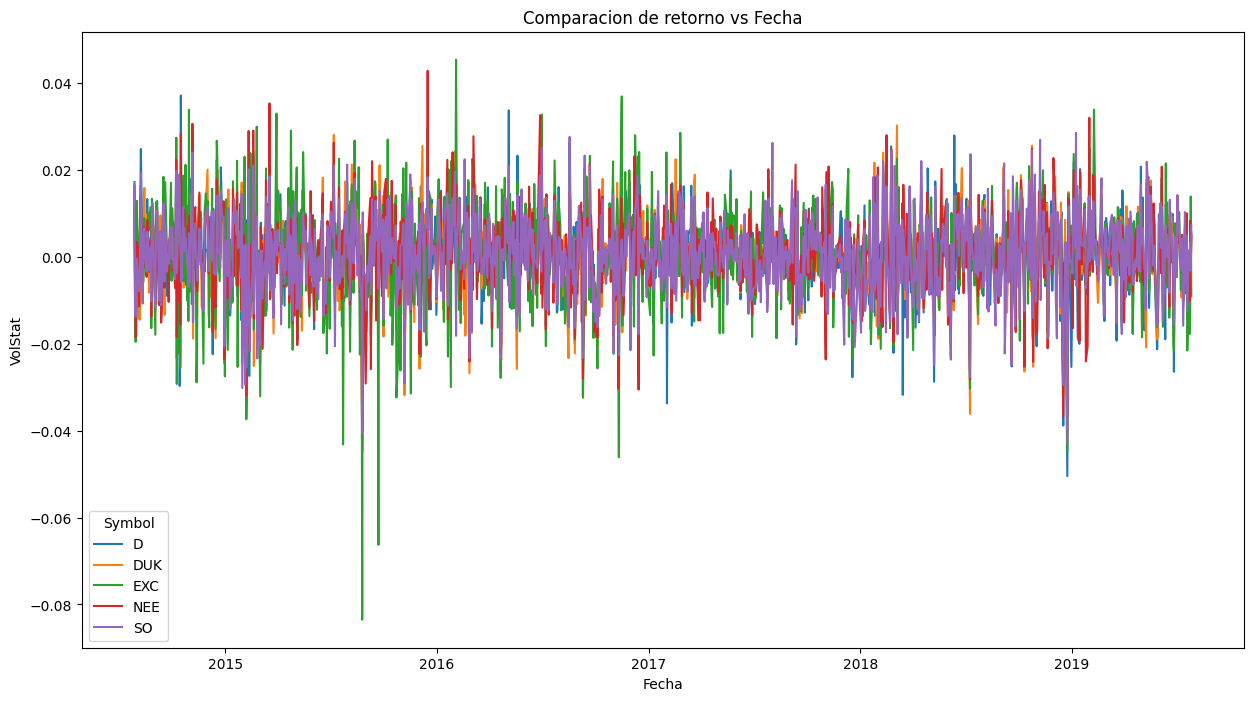

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.lineplot(x= agg_df2.Date, y= agg_df2.Return, hue=agg_df2.Symbol)
plt.xlabel('Fecha')
plt.ylabel('VolStat')
plt.title('Comparacion de retorno vs Fecha')

Text(0.5, 1.0, 'Comparacion de retorno vs Fecha')

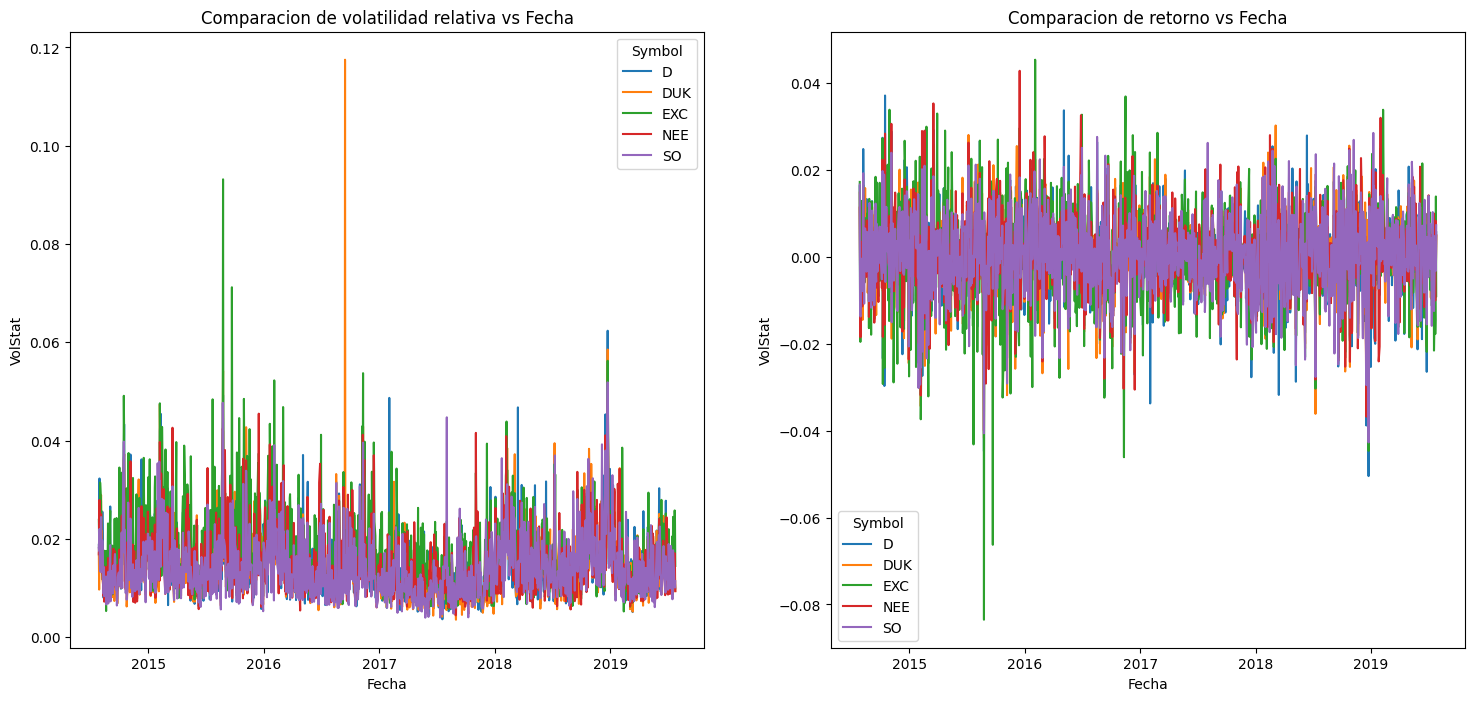

In [18]:
plt.figure(figsize=(18,8))
plt.subplot(121)
sns.lineplot(x= agg_df1.Date, y= agg_df1.VolStat, hue=agg_df1.Symbol)
plt.xlabel('Fecha')
plt.ylabel('VolStat')
plt.title('Comparacion de volatilidad relativa vs Fecha')
plt.subplot(122)
sns.lineplot(x= agg_df2.Date, y= agg_df2.Return, hue=agg_df2.Symbol)
plt.xlabel('Fecha')
plt.ylabel('VolStat')
plt.title('Comparacion de retorno vs Fecha')